$$\textbf{Optimización I. Tarea 3}$$
$$\textit{Y. Sarahi García Gozález}$$

$\color{lightblue}{Librerías \space }$ <br>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from math import sqrt

In [2]:
print("Tarea realizada en MacOs. \nLas versiones de las librerías y de python utilizadas fueron:\n")
from platform import python_version
print("Python version", python_version())
print("Numpy version", np.__version__)

Tarea realizada en MacOs. 
Las versiones de las librerías y de python utilizadas fueron:

Python version 3.11.7
Numpy version 1.26.3


In [8]:
#imprimimos el epsilon de la máquina
epsilon = np.finfo(float).eps
print("Epsilon de la máquina:", epsilon)

Epsilon de la máquina: 2.220446049250313e-16


$\color{lightblue}{Ejercicio \space 1}$ <br>

1. Programar la función que implementa el algoritmo de backtracking 
   (Algoritmo 2 de la Clase 6) que usa la condición de descenso suficiente
   (condición de Armijo) para seleccionar el tamaño de paso.

In [39]:
def backtracking(alpha_ini,rho,c,x_k,f,f_k,df_k,p_k,iter_max):

    '''
        Esta funcion parte de un tamaño de paso inicial alpha_ini y lo va recortando hasta que
        cumple la cond de descenso suficiente

        parametros:
            valores (float): alpha_ini, rho entre (0,1), f(x_k), Df(x_k) (gradiente en el punto x_k), c_1, 
            direccion de descenso (np.rray): p_k 

        returns:
            el tamaño de paso a_k
            numero de iteraciones realizadas i_k
    '''

    alpha=alpha_ini #fijamos alpha como el alpha inicial
    gp=c*np.dot(df_k,p_k) #hacemos el producto gradiente por direccion de descenso p
    
    for i in range(iter_max):
        x_kp=x_k+alpha*p_k

        #si la condicion de descenso se cumple, terminamos
        if f(x_kp)<=(f_k + alpha*gp):
            return alpha,i,True

        alpha=alpha*rho #si no se cumple la cond, hacemos alpha*rho
        print(alpha)

        
    return  alpha,i,False

2. Programar la función que implementa el algoritmo de descenso máximo con
   backtracking

In [106]:
def descenso_maximo_backtracking(f,df,x0,alpha_ini,rho,c,tau,max_iter,max_iter_b):
    '''
    Esta funcion busca el minimo de la funcion f usando la tecnica de backtracking

    Parametros: 
        f: función a optimizar
        df: gradiente de f
        x_0: valor inicial
        tau,N: tolerancia y numero maximo de iteraciones (descenso)
        parametros de 

        NOTA:los argumentos predeterminados son específicos para este ejercicio y n=2
    
    returns:
        x_k: ultimo punto de la sucesión que genera el algoritmo
        k: número de iteraciones
        True/False: Indica si se satisfizo la condición de tolerancia
        x1,x2...xk: sucesión de puntos (np.array)
        
    '''
    n=len(x0)
    x_k=x0
    indicador=False
    f_k=f(x_k)
    df_k=df(x_k)


    if n==2:
        m = np.zeros((max_iter+1,4))
        m[0,:] = x0[0],x0[1],1,0
    
 
    for k in range(max_iter):
        #calculmos pk y ak
        p_k=-df_k
        a_k,i,ind=backtracking(alpha_ini,rho,c,x_k,f,f_k,df_k,p_k,max_iter_b)
   
        if not ind:
            print('Insuficientes iteraciones Backtracking', a_k)

        x_k=x_k+(a_k*p_k)
        
        if n==2:
            m[k,:]= x_k[0],x_k[1],a_k,i


        if norm(a_k*p_k)<tau:#si se cumple la condicion de tolerania:
            indicador=True #indicador verdadero
            break #y romepos el ciclo

        f_k=f(x_k)
        df_k=df(x_k)

        
    if n==2:
        return x_k,k,indicador,m
    
    return x_k,k,indicador,None

#definicion de funcion para para las graficas dee los contornos

def contornosFnc2D(fncf, puntos, xleft, xright, ybottom, ytop, levels):
    # Crea una discretización uniforme del intervalo [xleft, xright]
    ax = np.linspace(xleft, xright, 250)
    # Crea una discretización uniforme del intervalo [ybottom, ytop]
    ay = np.linspace(ybottom, ytop, 200)
    # La matriz mX que tiene las abscisas 
    mX, mY = np.meshgrid(ax, ay)
    # Se crea el arreglo mZ con los valores de la función en cada nodo
    mZ = mX.copy()
    for i, y in enumerate(ay):
        for j, x in enumerate(ax):
            mZ[i,j] = fncf(np.array([x, y]))
    # Grafica de las curvas de nivel
    fig, ax = plt.subplots()
    CS = ax.contourf(mX, mY, mZ, levels, cmap='coolwarm')
    plt.colorbar(CS, ax=ax)
    # Grafica los puntos dados
    puntos_x = [p[0] for p in puntos]
    puntos_y = [p[1] for p in puntos]
    ax.plot(puntos_x, puntos_y, 'r.',label="Sucesión")
    ax.plot(puntos_x[0], puntos_y[0], 'g*',label="punto inicial")
    ax.plot(puntos_x[-1], puntos_y[-1], 'b*',label="mínimo encontrado")
     # Grafica los puntos como puntos rojos
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('Contornos de la función sucesión')
    plt.legend()
    plt.show()

3. Para probar el algoritmo, programe las siguientes funciones, calcule su gradiente 
   de manera analítica y programe la función correspondiente. Use cada punto 
   $\mathbf{x}_0$ como punto inicial del algoritmo.  


In [107]:
tau = sqrt(epsilon) #tolerancia (después multiplicaremos por sqrt(n))
aini = 1.0 
rho  = 0.8 
c1   = 0.1
N    = 30000 #iter maximas para descenso
Nb   = 600 #iter maximas para backtracking

**Función de Himmelblau:** Para $\mathbf{x}=(x_1,x_2)$

$$ f(\mathbf{x}) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2. $$


In [108]:
# Función objetivo
def Himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2;

# Gradiente de la función objetivo
def D_Himmelblau(x):
    gx = 4*x[0]*(x[0]**2 + x[1] - 11) + 2*(x[0] + x[1]**2 - 7)
    gy = 2*(x[0]**2 + x[1] - 11) + 4*x[1]*(x[0] + x[1]**2 - 7)
    return np.array([gx, gy])


$$ \mathbf{x}_0 = (2.,4.) $$


It =  19
x_k       =  [3. 2.]
f(x_k)    =  1.23663479977415e-09
||gk||   =  0.00044330315784787863
a_k promedio=  0.019969908873998143
It promedio (Backtracking)=  18.736842105263158
Sí se cumplio el criterio de convergencia


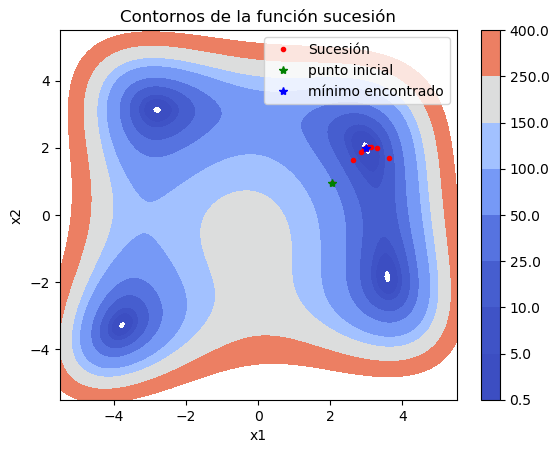

In [126]:
x0  = np.array([2,4])
n   = len(x0)
tau = np.sqrt(n) * tau

xk, k, indicador, m = descenso_maximo_backtracking(Himmelblau,D_Himmelblau,x0,aini,rho,c1,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Himmelblau(xk))
print('||gk||   = ', np.linalg.norm(D_Himmelblau(xk)))
print('a_k promedio= ', np.sum(m[:,2])/k)
print('It promedio (Backtracking)= ', np.sum(m[:,3])/k)

if(indicador):
    print("Sí se cumplio el criterio de convergencia")

# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Himmelblau, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

$$ \mathbf{x}_0 = (0.,0.) $$

It =  21
x_k       =  [3. 2.]
f(x_k)    =  4.717615068996038e-09
||gk||   =  0.0008604665787911859
a_k promedio=  0.027386797442650563
It promedio (Backtracking)=  18.095238095238095
Sí se cumplio el criterio de convergencia


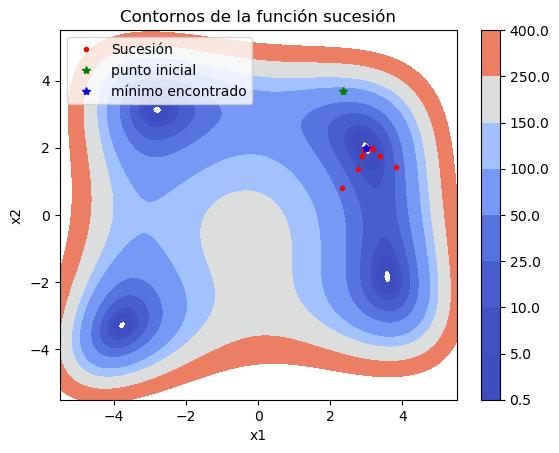

In [127]:
x0  = np.array([0,0])
n   = len(x0)
tau = np.sqrt(n) * tau

xk, k, indicador, m = descenso_maximo_backtracking(Himmelblau,D_Himmelblau,x0,aini,rho,c1,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Himmelblau(xk))
print('||gk||   = ', np.linalg.norm(D_Himmelblau(xk)))
print('a_k promedio= ', np.sum(m[:,2])/k)
print('It promedio (Backtracking)= ', np.sum(m[:,3])/k)

if(indicador):
    print("Sí se cumplio el criterio de convergencia")

# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Himmelblau, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

**Función de Beale :** Para $\mathbf{x}=(x_1,x_2)$

$$ f(\mathbf{x}) = (1.5-x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2.$$

   

In [4]:
# Definir la función f
def Beale(x):
    return (1.5 - (x[0]) + (x[0])*(x[1]))**2 + (2.25 - (x[0]) + (x[0])*(x[1])**2)**2 + (2.625 - (x[0]) + (x[0])*(x[1])**3)**2

def D_Beale(x):
    Partial_Beale_dx1 = 2*(1.5 - (x[0]) + (x[0])*(x[1]))*(-1 + (x[1])) + 2*(2.25 - (x[0]) + (x[0])*(x[1])**2)*(-1 + (x[1])**2) + 2*(2.625 - (x[0]) + (x[0])*(x[1])**3)*(-1 + (x[1])**3)
    Partial_Beale_dx2 = 2*(1.5 - (x[0]) + (x[0])*(x[1]))*((x[0])) + 2*(2.25 - (x[0]) + (x[0])*(x[1])**2)*(2*(x[0])*(x[1])) + 2*(2.625 - (x[0]) + (x[0])*(x[1])**3)*(3*(x[0])*(x[1])**2)
    return np.array([Partial_Beale_dx1, Partial_Beale_dx2])


$$ \mathbf{x}_0 = (2.,3.) $$


It =  362
x_k       =  [2.9977 0.4994]
f(x_k)    =  8.826829303682075e-07
||gk||   =  0.0014628866017103528
a_k promedio=  0.04610620933065591
It promedio (Backtracking)=  13.986187845303867
Sí se cumplio el criterio de convergencia


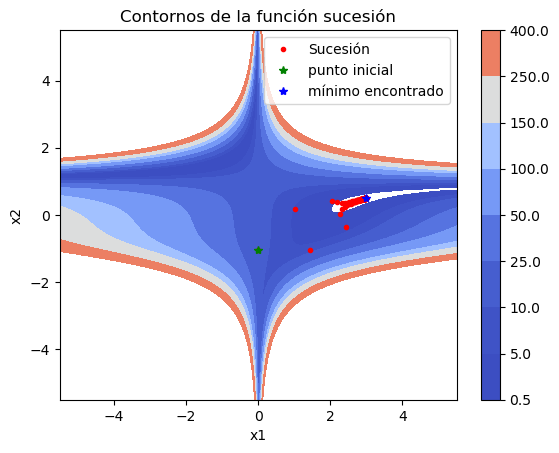

In [128]:
x0  = np.array([2,3])
n   = len(x0)
tau = np.sqrt(n) * tau

xk, k, indicador, m = descenso_maximo_backtracking(Beale,D_Beale,x0,aini,rho,c1,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Beale(xk))
print('||gk||   = ', np.linalg.norm(D_Beale(xk)))
print('a_k promedio= ', np.sum(m[:,2])/k)
print('It promedio (Backtracking)= ', np.sum(m[:,3])/k)

if(indicador):
    print("Sí se cumplio el criterio de convergencia")

    
# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Beale, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

$$ \mathbf{x}_0 = (2.,4.) $$

It =  16189
x_k       =  [3.0032 0.5008]
f(x_k)    =  1.6919458399457938e-06
||gk||   =  0.0019295310213115627
a_k promedio=  0.0055301097630071384
It promedio (Backtracking)=  24.505528445240596
Sí se cumplio el criterio de convergencia


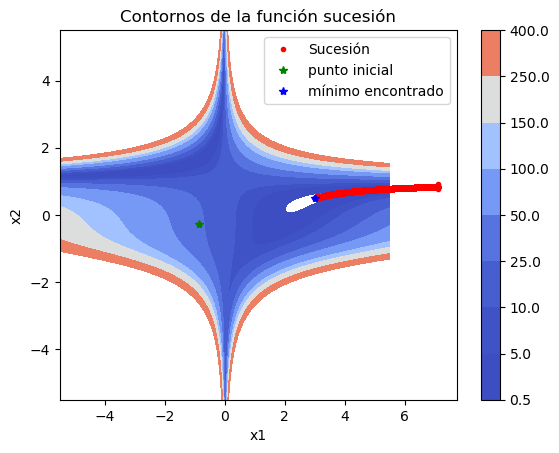

In [129]:
x0  = np.array([2,4])
n   = len(x0)
tau = np.sqrt(n) * tau

xk, k, indicador, m = descenso_maximo_backtracking(Beale,D_Beale,x0,aini,rho,c1,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Beale(xk))
print('||gk||   = ', np.linalg.norm(D_Beale(xk)))
print('a_k promedio= ', np.sum(m[:,2])/k)
print('It promedio (Backtracking)= ', np.sum(m[:,3])/k)

if(indicador):
    print("Sí se cumplio el criterio de convergencia")

# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Beale, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

**Función de Rosenbrock:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

$$ f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[100(x_{i+1} - x_i^2)^2 + (1-x_i)^2 \right]
\quad n\geq 2.$$


In [5]:
def Rosenbrock(x):
    n = len(x)
    suma = 0
    for i in range(n-1):
        suma += 100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2
    return suma

def D_Rosenbrock(x):
    n = len(x)
    gradient = np.zeros(n)
    for i in range(n-1):
        gradient[i] += -400 * x[i] * (x[i+1] - x[i]**2) - 2 * (1 - x[i])
        gradient[i+1] += 200 * (x[i+1] - x[i]**2)
    return gradient

$$ \mathbf{x}_0 = (-2.1, 4.5) $$



It =  10570
x_k       =  [1.0404 1.0825]
f(x_k)    =  0.0016336921589174909
||gk||   =  0.07257556744503656
a_k promedio=  0.0012460254586618856
It promedio (Backtracking)=  30.62421948912015
Sí se cumplio el criterio de convergencia


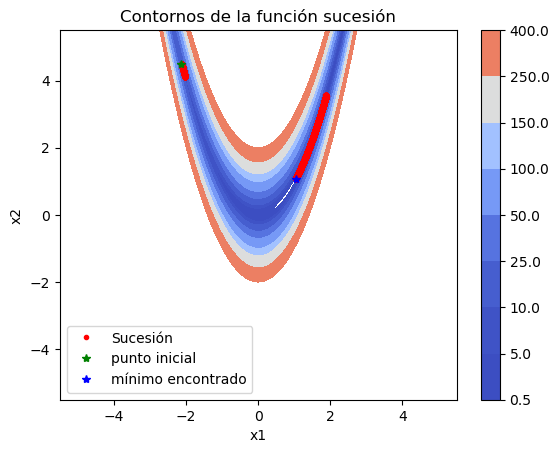

In [130]:
x0  = np.array([-2.1,4.5])
n   = len(x0)
tau = np.sqrt(n) * tau

xk, k, indicador, m = descenso_maximo_backtracking(Rosenbrock,D_Rosenbrock,x0,aini,rho,c1,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Rosenbrock(xk))
print('||gk||   = ', np.linalg.norm(D_Rosenbrock(xk)))
print('a_k promedio= ', np.sum(m[:,2])/k)
print('It promedio (Backtracking)= ', np.sum(m[:,3])/k)

if(indicador):
    print("Sí se cumplio el criterio de convergencia")

# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Rosenbrock, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

$$ \mathbf{x}_0 = (-1.2, 1.0) $$

It =  25
x_k       =  [1.0406 1.0831]
f(x_k)    =  0.0016559763247342015
||gk||   =  0.08946301785748992
a_k promedio=  0.022045994149696012
It promedio (Backtracking)=  29.08
Sí se cumplio el criterio de convergencia


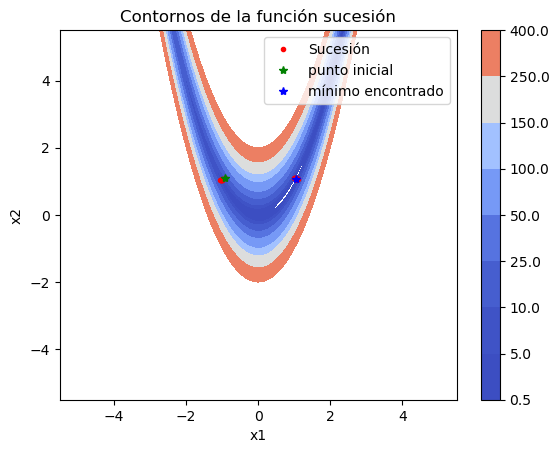

In [131]:
x0  = np.array([-1.2,1.0])
n   = len(x0)
tau = np.sqrt(n) * tau

xk, k, indicador, m = descenso_maximo_backtracking(Rosenbrock,D_Rosenbrock,x0,aini,rho,c1,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Rosenbrock(xk))
print('||gk||   = ', np.linalg.norm(D_Rosenbrock(xk)))
print('a_k promedio= ', np.sum(m[:,2])/k)
print('It promedio (Backtracking)= ', np.sum(m[:,3])/k)

if(indicador):
    print("Sí se cumplio el criterio de convergencia")

# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Rosenbrock, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

$$ \mathbf{x}_0 = (-2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5) $$

In [132]:
x0  = np.array([-2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5])
n   = len(x0)
tau = np.sqrt(n) * tau

xk, k, indicador, m = descenso_maximo_backtracking(Rosenbrock,D_Rosenbrock,x0,aini,rho,c1,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Rosenbrock(xk))
print('||gk||   = ', np.linalg.norm(D_Rosenbrock(xk)))

if(indicador):
    print("Sí se cumplio el criterio de convergencia")

It =  1672
x_k       =  [0.9993 0.9984 0.997  0.9937 0.9878 0.9754 0.9515 0.9049 0.8185 0.6688]
f(x_k)    =  0.04535909883951292
||gk||   =  0.5328657232505393
Sí se cumplio el criterio de convergencia


$$ \mathbf{x}_0 = (-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0) $$

In [133]:
x0  = np.array([-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0])
n   = len(x0)
tau = np.sqrt(n) * tau

xk, k, indicador, m = descenso_maximo_backtracking(Rosenbrock,D_Rosenbrock,x0,aini,rho,c1,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Rosenbrock(xk))
print('||gk||   = ', np.linalg.norm(D_Rosenbrock(xk)))

if(indicador):
    print("Sí se cumplio el criterio de convergencia")

It =  1110
x_k       =  [0.9977 0.9961 0.9911 0.9836 0.9661 0.9343 0.8721 0.7605 0.5774 0.3309]
f(x_k)    =  0.2594400603794069
||gk||   =  1.6295174457744162
Sí se cumplio el criterio de convergencia


3. Nocedal sugiere que la constante $c_1$ sea del orden de $0.0001$. 
   Use $c_1=0.0001$ y  repeta la prueba con la función de Beale y 
   explique en qué casos conviene usar un valor grande o pequeño de $c_1$.

It =  20
x_k       =  [-0.0083  6.8036]
f(x_k)    =  5.630209087256699
||gk||   =  208.41356712239173
a_k promedio=  0.009031669012744608
It promedio (Backtracking)=  42.95
Sí se cumplio el criterio de convergencia


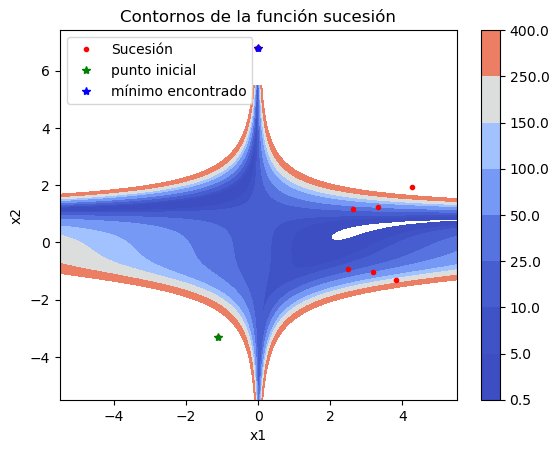

In [134]:
x0  = np.array([2,3])
n   = len(x0)
tau = np.sqrt(n) * tau

c1=0.0001
xk, k, indicador, m = descenso_maximo_backtracking(Beale,D_Beale,x0,aini,rho,c1,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Beale(xk))
print('||gk||   = ', np.linalg.norm(D_Beale(xk)))
print('a_k promedio= ', np.sum(m[:,2])/k)
print('It promedio (Backtracking)= ', np.sum(m[:,3])/k)

if(indicador):
    print("Sí se cumplio el criterio de convergencia")

    
# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Beale, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

It =  2
x_k       =  [-0.0846  3.3297]
f(x_k)    =  3.819260162109049
||gk||   =  4.607195669855177
a_k promedio=  0.0009418960872345818
It promedio (Backtracking)=  50.5
Sí se cumplio el criterio de convergencia


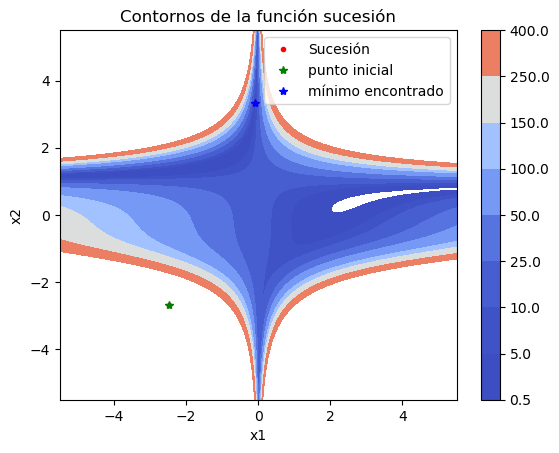

In [135]:
x0  = np.array([2,4])
n   = len(x0)
tau = np.sqrt(n) * tau

c1=0.0001
xk, k, indicador, m = descenso_maximo_backtracking(Beale,D_Beale,x0,aini,rho,c1,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Beale(xk))
print('||gk||   = ', np.linalg.norm(D_Beale(xk)))
print('a_k promedio= ', np.sum(m[:,2])/k)
print('It promedio (Backtracking)= ', np.sum(m[:,3])/k)

if(indicador):
    print("Sí se cumplio el criterio de convergencia")

    
# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Beale, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

$\color{lightblue}{Ejercicio \space 2}$ <br>

$\color{lightblue}{Ejercicio \space 3}$ <br>

3.1 Verificamos si $p_0$ es dirección de descenso:

* El gradiente de f:
\begin{align*}
f(x_1, x_2) &= 5 + (x_1)^2 + (x_2)^2 \\
\nabla f(x_1, x_2) &= \nabla f{x_1}{x_2} \\
&= (2x_1, 2x_2)
\end{align*}

\begin{align*}
\implies \nabla f(\textbf{x}_0)= (-2, 2)
\end{align*}

* Dirección p:

\begin{align*}
\textbf{p}_0=(1,0) 
\end{align*}


\begin{align*}
&\implies \nabla f(\textbf{x}_0)\textbf{p}_0=(-2,2)^T (1,0)=-2+0=-2\\
\end{align*}

$$\implies \nabla f(\textbf{x}_0)\textbf{p}_0 <0$$

Por lo que $p_0$ es dirección de descenso


3.2 Encontramos $\alpha_{max}$ que satisface la dirección de descenso:


* f evaluada en $x_0 + p_0$ 
$$f(x_0 + p_0)=f((-1,1)+(1,0))=f(0,1)=6$$

* f evaluada en $x_0$

$$f(x_0)=f(-1,1)=7$$

*Establecemos la desigualdad de la condición de descenso suficiente:

$$f(x_0 + p_0) \leq f(x_0) + c_1\alpha \textbf{p}_0^T \nabla f(x_0) $$

$$6 \leq 7+ 10^{-4} \alpha (-2)$$

*despejamos $\alpha$

$$\alpha \leq 20^{4}$$

$\color{lightblue}{Ejercicio \space 4}$ <br>

Sea $f ∶ Rn → R$ y S una matriz no singular de tamaño $n \times n$. Si $x = Sy$ para $y \in Rn$ y definimos
$g(y) = f(Sy)$.

* A plicando la regla de la cadena muestre que $\nabla g(y) = S^{⊤} \nabla f(x)$


Partimos del gradiente de $g(y)$:
$$\nabla _y g(y)= \nabla _y f(Sy)=\nabla _y f(x)$$

$$\implies \nabla _y g(y)= \nabla _x f(x) * \nabla _y x$$

$$\implies \nabla _y g(y)= \nabla _x f(x) * \nabla _y Sy $$

S es una matriz y $ \nabla _y y=(1,1,1,1...)$, por lo que 

$$\nabla _y g(y)= S^{⊤}  \nabla _x f(x)   $$

* Muestre que $−D\nabla𝑓(x_k)$ con $D=SS^{⊤}$ es una dirección de descenso

Partimos del producto entre eñ grandiente y  $ -D\nabla f(x)$



$$\nabla f(x)^{⊤} [-D\nabla f(x)]=-\nabla f(x)^{⊤}  SS^{⊤}  \nabla f(x)$$

$$\implies -[\nabla f(x)^{⊤}  S][S^{⊤}  \nabla f(x) ]$$

$$\implies -[\nabla f(x)  S^{⊤}]^{⊤}[S^{⊤}  \nabla f(x) ]$$


Pero usando que $\nabla _y g(y)= S^{⊤}  \nabla _x f(x) $ (resultado anterior)


$$\implies \nabla f(x)^{⊤} [-D\nabla f(x)]=-[\nabla _y g(y)]^{⊤}[\nabla _y g(y)]=-||\nabla _y g(y)||^2$$

Y la norma siempre es mayor o igual que cero, por lo que 

$$\nabla f(x)^{⊤} [-D\nabla f(x)] \leq 0$$

Así que $-D\nabla f(x)$ es una dirección de descenso